In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mrandika/CII3C3_ML_Ensemble-Learning/main/german_credit.csv")

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
# Get dataset sample
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [ ]:
# Check if dataset contain any null
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
# Describe the dataset
df.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [ ]:
# Feature selection, drop the unwanted column
df.drop(['savings', 'employment_duration', 'personal_status_sex', 'other_debtors', 'present_residence', 'other_installment_plans', 'housing', 'people_liable', 'telephone'], axis=1, inplace=True)

In [ ]:
# Encode each column
for col in df.columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])

In [ ]:
df.head()

,status,duration,credit_history,purpose,amount,installment_rate,property,age,number_credits,job,foreign_worker,credit_risk
0,3,13,0,2,116,2,1,2,0,1,0,1
1,3,5,0,5,528,1,3,17,1,1,0,1
2,0,8,4,8,72,1,3,4,0,3,0,1
3,3,8,0,5,398,0,3,20,1,3,1,1
4,3,8,0,5,411,2,1,19,1,3,1,1


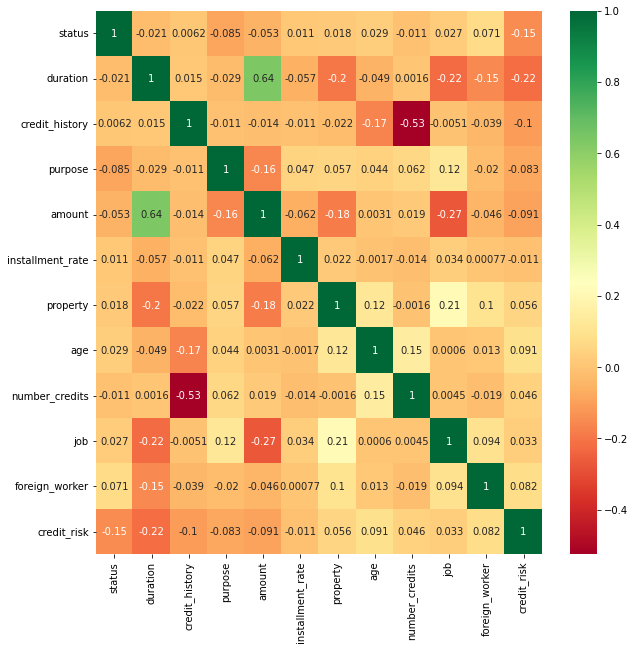

In [ ]:
# Compute correlation matrix using pearson method
corrmat = df.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(df[corrmat.index].corr(), annot=True, cmap="RdYlGn")

In [ ]:
# Normalize the column
columns = ['duration', 'amount', 'age']

# Normalize each column
for col in columns:
    X = df[col].values.reshape(-1, 1)

    scaler = MinMaxScaler()
    scaler.fit(X)
    df[col] = scaler.transform(X)

In [ ]:
# Select the features
X = df.drop('credit_risk', axis=1, inplace=False)

# Select the label
y = df['credit_risk']

In [ ]:
# Split the dataset, training, validation, and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [ ]:
# Create base model using DecisionTree
base_model = DecisionTreeClassifier()

In [ ]:
# Modelling
model = BaggingClassifier(base_estimator=base_model, n_estimators=10)

In [ ]:
# Train the model
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
# Run on test set
y_pred = model.predict(X_test)

# Compute the training accuracy
train_accuracy = model.score(X_train, y_train)

In [ ]:
print(f'Training accuracy: {train_accuracy:.3f}')

Training accuracy: 0.988


In [ ]:
print(confusion_matrix(y_test.to_numpy(), y_pred))

[[1 1]
 [1 7]]


In [ ]:
print(classification_report(y_test.to_numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.88      0.88      0.88         8

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10

